<a href="https://colab.research.google.com/github/SSudharsan10/ssudharsan10/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
#loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gold price dataset.csv')

In [3]:
#print first 5 rows in dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#number of rows and colums
gold_data.shape

(2290, 6)

In [5]:
#Basic Information about Data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#Checking Number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#Statistical measures of data
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1.   Positive Correlation
2.   Negative Correlation



In [10]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

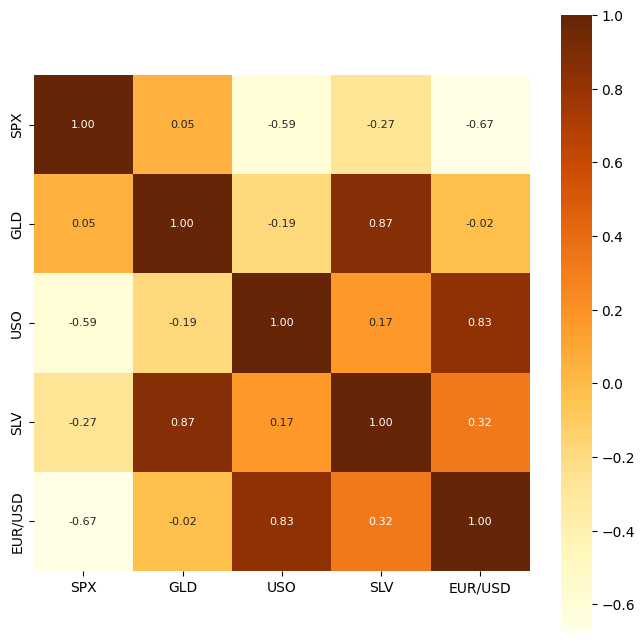

In [16]:
#Construction of Heat Map to understand Correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8},cmap="YlOrBr")

In [17]:
#Correaltion values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-19-45c846487b21>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='orange')


<Axes: xlabel='GLD', ylabel='Density'>

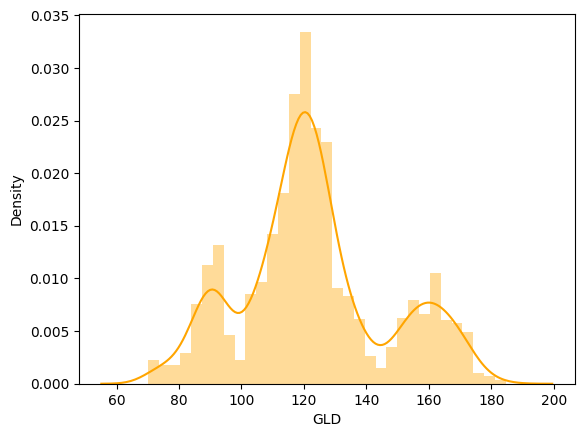

In [19]:
#checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'], color='orange')

Splitting the Features(Others) and Target(Gold)

In [20]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']


In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation


In [28]:
#Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [29]:
print(test_data_prediction)

[168.46489974  81.76490018 116.07620029 127.70250095 120.87740132
 154.80249736 150.27079873 126.19200001 117.47659871 126.12980052
 116.56350136 172.06540083 141.6799994  167.99819883 115.21850011
 117.80420041 137.91860321 169.94310006 159.83140342 158.57889963
 155.15879981 125.48660004 175.76269997 157.05790377 125.18520036
  93.71899926  77.89780012 121.03189978 119.14639979 167.3825004
  88.05500033 125.33570004  90.99560044 117.59910035 121.05929876
 136.88430073 115.26090142 115.08420062 147.3016997  107.34620088
 104.46530222  87.17219797 126.4050005  117.86800004 154.1889989
 119.67430006 108.38130053 108.25699842  93.17270038 127.4688968
  74.95150055 113.70019925 121.53989975 111.21739899 118.96279909
 120.66299969 159.22590064 167.18410108 147.11559691  85.95359835
  94.45370018  86.77369877  90.57700049 118.8123009  126.40550073
 127.47740045 169.99089991 122.25769903 117.31009911  98.65540037
 168.60740159 142.96399817 132.19430258 121.1729024  121.35769967
 119.69030079

In [30]:
#R squared error (comparing)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891544799689601


Comparing the Actual Values vs Predicted Value in a Plot

In [31]:
Y_test = list(Y_test)

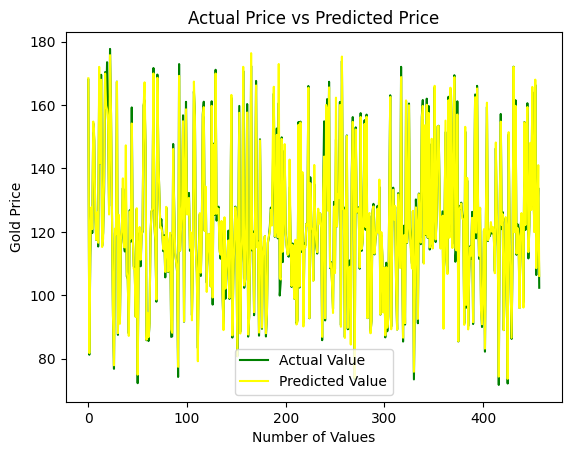

In [33]:
plt.plot(Y_test, color='green', label='Actual Value')
plt.plot(test_data_prediction, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()